In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 日本語フォントの設定
plt.rcParams['font.family'] = 'Hiragino Sans'
plt.rcParams['axes.unicode_minus'] = False


In [30]:
read_csv_path = 'slack.csv'
df_slack = pd.read_csv(read_csv_path)
df_slack

,日付,有効化されたメンバーシップの合計,有効化された通常メンバーの合計,有効化されたゲスト,アクティブなメンバー数（日次）,メッセージを投稿した人数（日次）,アクティブなメンバー数（週次）,メッセージを投稿した人数（週次）,パブリックチャンネルのメッセージ,プライベートチャンネルのメッセージ,...,申請された通常メンバー総数,申請されたゲスト総数,申請されたメンバーの合計,アップロードファイル数,メンバーにより投稿されたメッセージ数,パブリックチャンネル、1つのワークスペース,投稿されたメッセージ数,アプリが投稿したメッセージ数,アクティブなメンバー数（月間）,メッセージを投稿した人数（月間）
0,2025-04-01,570,440,130,299,45,483,158,13,2,...,440,124,564,40,196,905,259,1,526,332
1,2025-04-02,575,445,130,299,52,493,152,23,7,...,445,124,569,33,221,905,264,2,531,334
2,2025-04-03,581,447,134,248,81,495,164,81,12,...,447,128,575,48,577,926,850,0,539,342
3,2025-04-04,591,457,134,337,80,504,173,89,54,...,457,128,585,226,517,926,729,0,549,343
4,2025-04-05,592,458,134,201,29,504,171,2,0,...,458,128,586,13,127,926,146,0,550,347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2025-06-02,576,456,120,328,112,439,322,109,28,...,456,117,573,80,469,935,621,96,470,396
63,2025-06-03,576,456,120,334,105,438,297,67,3,...,456,117,573,92,674,936,785,40,470,398
64,2025-06-04,576,456,120,372,204,440,331,570,1,...,456,117,573,97,1780,936,1886,27,470,398
65,2025-06-05,577,456,121,349,95,452,328,55,4,...,456,118,574,70,474,936,524,0,473,401


In [31]:
df_no_date = df_slack.drop(columns=['日付'])
df_no_date

,有効化されたメンバーシップの合計,有効化された通常メンバーの合計,有効化されたゲスト,アクティブなメンバー数（日次）,メッセージを投稿した人数（日次）,アクティブなメンバー数（週次）,メッセージを投稿した人数（週次）,パブリックチャンネルのメッセージ,プライベートチャンネルのメッセージ,共有チャンネルへの投稿メッセージ数,...,申請された通常メンバー総数,申請されたゲスト総数,申請されたメンバーの合計,アップロードファイル数,メンバーにより投稿されたメッセージ数,パブリックチャンネル、1つのワークスペース,投稿されたメッセージ数,アプリが投稿したメッセージ数,アクティブなメンバー数（月間）,メッセージを投稿した人数（月間）
0,570,440,130,299,45,483,158,13,2,0,...,440,124,564,40,196,905,259,1,526,332
1,575,445,130,299,52,493,152,23,7,0,...,445,124,569,33,221,905,264,2,531,334
2,581,447,134,248,81,495,164,81,12,2,...,447,128,575,48,577,926,850,0,539,342
3,591,457,134,337,80,504,173,89,54,0,...,457,128,585,226,517,926,729,0,549,343
4,592,458,134,201,29,504,171,2,0,0,...,458,128,586,13,127,926,146,0,550,347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,576,456,120,328,112,439,322,109,28,0,...,456,117,573,80,469,935,621,96,470,396
63,576,456,120,334,105,438,297,67,3,0,...,456,117,573,92,674,936,785,40,470,398
64,576,456,120,372,204,440,331,570,1,1,...,456,117,573,97,1780,936,1886,27,470,398
65,577,456,121,349,95,452,328,55,4,3,...,456,118,574,70,474,936,524,0,473,401


In [32]:
# 相関行列の計算
correlation_matrix = df_no_date.corr()
print("相関行列")
correlation_matrix.round(3)


相関行列


,有効化されたメンバーシップの合計,有効化された通常メンバーの合計,有効化されたゲスト,アクティブなメンバー数（日次）,メッセージを投稿した人数（日次）,アクティブなメンバー数（週次）,メッセージを投稿した人数（週次）,パブリックチャンネルのメッセージ,プライベートチャンネルのメッセージ,共有チャンネルへの投稿メッセージ数,...,申請された通常メンバー総数,申請されたゲスト総数,申請されたメンバーの合計,アップロードファイル数,メンバーにより投稿されたメッセージ数,パブリックチャンネル、1つのワークスペース,投稿されたメッセージ数,アプリが投稿したメッセージ数,アクティブなメンバー数（月間）,メッセージを投稿した人数（月間）
有効化されたメンバーシップの合計,1.000,0.281,0.873,-0.015,-0.068,0.435,-0.287,0.004,0.071,-0.127,...,0.281,0.888,0.985,0.081,-0.024,-0.264,0.041,0.043,0.157,-0.284
有効化された通常メンバーの合計,0.281,1.000,-0.222,0.053,0.168,-0.276,0.344,0.132,0.013,0.034,...,1.000,-0.179,0.403,0.129,0.175,0.752,0.151,0.098,-0.111,0.287
有効化されたゲスト,0.873,-0.222,1.000,-0.042,-0.155,0.582,-0.466,-0.063,0.066,-0.146,...,-0.222,0.992,0.797,0.017,-0.113,-0.649,-0.035,-0.006,0.216,-0.434
アクティブなメンバー数（日次）,-0.015,0.053,-0.042,1.000,0.730,0.119,0.209,0.359,0.209,0.286,...,0.053,-0.065,-0.030,0.502,0.571,-0.002,0.601,0.052,0.258,-0.131
メッセージを投稿した人数（日次）,-0.068,0.168,-0.155,0.730,1.000,0.003,0.487,0.697,0.223,0.265,...,0.168,-0.139,-0.034,0.527,0.813,0.196,0.830,0.191,-0.023,0.218
アクティブなメンバー数（週次）,0.435,-0.276,0.582,0.119,0.003,1.000,-0.098,-0.080,0.122,-0.003,...,-0.276,0.562,0.366,0.154,0.017,-0.603,0.060,-0.142,0.440,-0.320
メッセージを投稿した人数（週次）,-0.287,0.344,-0.466,0.209,0.487,-0.098,1.000,0.309,0.039,0.228,...,0.344,-0.400,-0.176,0.240,0.466,0.528,0.437,0.263,-0.368,0.689
パブリックチャンネルのメッセージ,0.004,0.132,-0.063,0.359,0.697,-0.080,0.309,1.000,0.163,0.047,...,0.132,-0.034,0.044,0.307,0.711,0.158,0.706,0.237,-0.173,0.207
プライベートチャンネルのメッセージ,0.071,0.013,0.066,0.209,0.223,0.122,0.039,0.163,1.000,-0.016,...,0.013,0.067,0.070,0.305,0.104,-0.018,0.149,0.068,-0.044,0.070
共有チャンネルへの投稿メッセージ数,-0.127,0.034,-0.146,0.286,0.265,-0.003,0.228,0.047,-0.016,1.000,...,0.034,-0.140,-0.111,0.275,0.134,0.097,0.128,-0.086,0.014,0.080


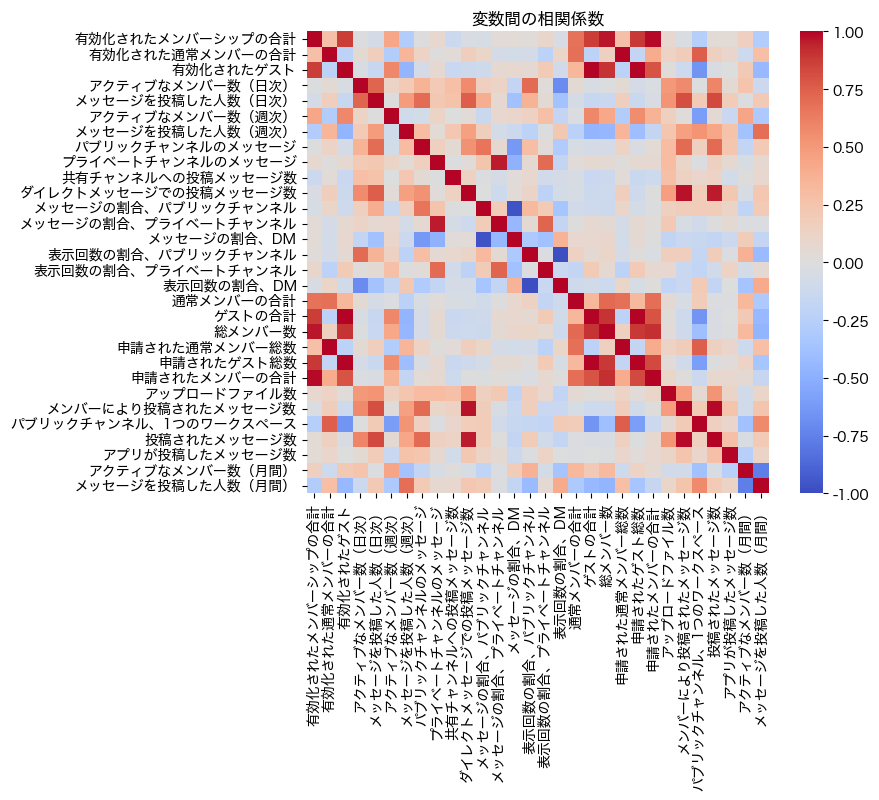

In [33]:
# 相関行列のヒートマップ
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,
            cmap='coolwarm',  # カラーマップ
            center=0,  # 0を中心に
            vmin=-1, vmax=1,  # 範囲を-1から1に
            square=True)  # 正方形のセル
plt.title('変数間の相関係数')
plt.show()


相関が見られる部分を抽出する

In [34]:
df1 = df_no_date[['アクティブなメンバー数（日次）','メッセージを投稿した人数（日次）','パブリックチャンネルのメッセージ','アップロードファイル数','アプリが投稿したメッセージ数']]
df1

,アクティブなメンバー数（日次）,メッセージを投稿した人数（日次）,パブリックチャンネルのメッセージ,アップロードファイル数,アプリが投稿したメッセージ数
0,299,45,13,40,1
1,299,52,23,33,2
2,248,81,81,48,0
3,337,80,89,226,0
4,201,29,2,13,0
...,...,...,...,...,...
62,328,112,109,80,96
63,334,105,67,92,40
64,372,204,570,97,27
65,349,95,55,70,0


In [35]:
# 相関行列の計算
correlation_matrix = df1.corr()
print("相関行列")
correlation_matrix.round(3)


相関行列


,アクティブなメンバー数（日次）,メッセージを投稿した人数（日次）,パブリックチャンネルのメッセージ,アップロードファイル数,アプリが投稿したメッセージ数
アクティブなメンバー数（日次）,1.000,0.730,0.359,0.502,0.052
メッセージを投稿した人数（日次）,0.730,1.000,0.697,0.527,0.191
パブリックチャンネルのメッセージ,0.359,0.697,1.000,0.307,0.237
アップロードファイル数,0.502,0.527,0.307,1.000,0.114
アプリが投稿したメッセージ数,0.052,0.191,0.237,0.114,1.000


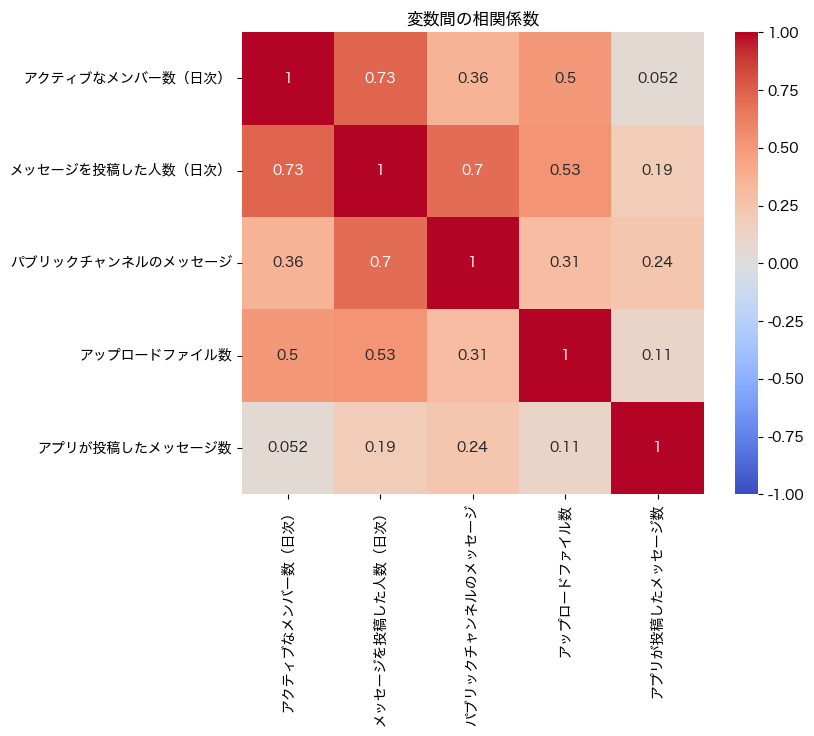

In [36]:
# 相関行列のヒートマップ
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,
            annot=True,  # 数値を表示
            cmap='coolwarm',  # カラーマップ
            center=0,  # 0を中心に
            vmin=-1, vmax=1,  # 範囲を-1から1に
            square=True)  # 正方形のセル
plt.title('変数間の相関係数')
plt.show()

In [37]:
df2 = df_no_date[['メッセージを投稿した人数（日次）','アクティブなメンバー数（日次）','アクティブなメンバー数（週次）','パブリックチャンネルのメッセージ','プライベートチャンネルのメッセージ','共有チャンネルへの投稿メッセージ数','ダイレクトメッセージでの投稿メッセージ数','投稿されたメッセージ数']]
df2

,メッセージを投稿した人数（日次）,アクティブなメンバー数（日次）,アクティブなメンバー数（週次）,パブリックチャンネルのメッセージ,プライベートチャンネルのメッセージ,共有チャンネルへの投稿メッセージ数,ダイレクトメッセージでの投稿メッセージ数,投稿されたメッセージ数
0,45,299,483,13,2,0,181,259
1,52,299,493,23,7,0,191,264
2,81,248,495,81,12,2,484,850
3,80,337,504,89,54,0,374,729
4,29,201,504,2,0,0,125,146
...,...,...,...,...,...,...,...,...
62,112,328,439,109,28,0,332,621
63,105,334,438,67,3,0,604,785
64,204,372,440,570,1,1,1209,1886
65,95,349,452,55,4,3,415,524


In [38]:
# 相関行列の計算
correlation_matrix = df2.corr()
print("相関行列")
correlation_matrix.round(3)


相関行列


,メッセージを投稿した人数（日次）,アクティブなメンバー数（日次）,アクティブなメンバー数（週次）,パブリックチャンネルのメッセージ,プライベートチャンネルのメッセージ,共有チャンネルへの投稿メッセージ数,ダイレクトメッセージでの投稿メッセージ数,投稿されたメッセージ数
メッセージを投稿した人数（日次）,1.000,0.730,0.003,0.697,0.223,0.265,0.750,0.830
アクティブなメンバー数（日次）,0.730,1.000,0.119,0.359,0.209,0.286,0.564,0.601
アクティブなメンバー数（週次）,0.003,0.119,1.000,-0.080,0.122,-0.003,0.039,0.060
パブリックチャンネルのメッセージ,0.697,0.359,-0.080,1.000,0.163,0.047,0.539,0.706
プライベートチャンネルのメッセージ,0.223,0.209,0.122,0.163,1.000,-0.016,0.030,0.149
共有チャンネルへの投稿メッセージ数,0.265,0.286,-0.003,0.047,-0.016,1.000,0.147,0.128
ダイレクトメッセージでの投稿メッセージ数,0.750,0.564,0.039,0.539,0.030,0.147,1.000,0.956
投稿されたメッセージ数,0.830,0.601,0.060,0.706,0.149,0.128,0.956,1.000


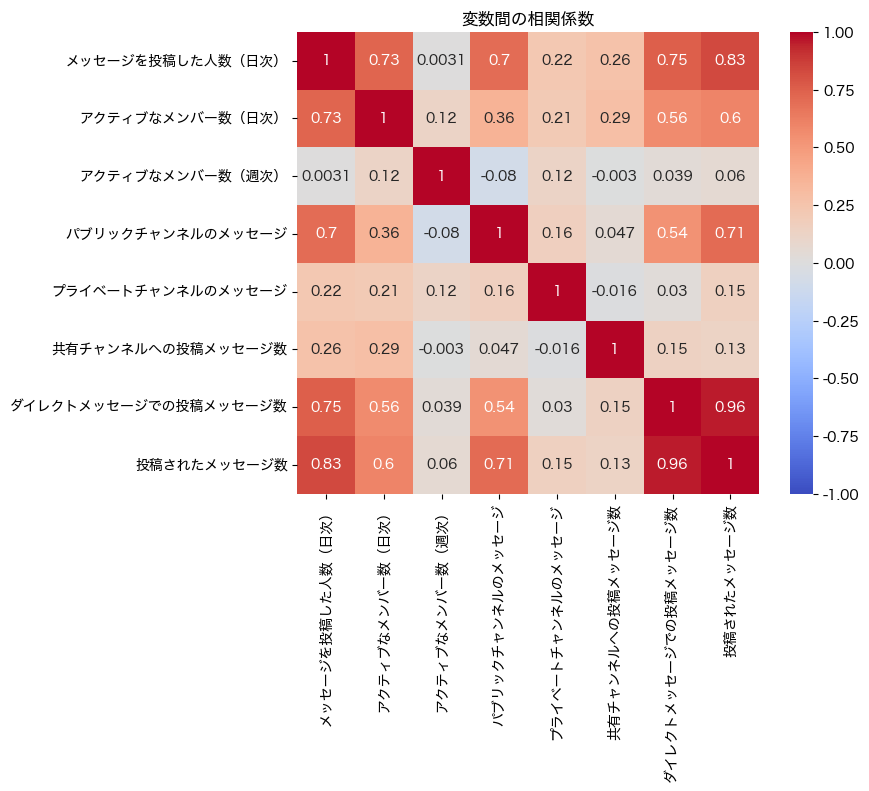

In [39]:
# 相関行列のヒートマップ
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,
            annot=True,  # 数値を表示
            cmap='coolwarm',  # カラーマップ
            center=0,  # 0を中心に
            vmin=-1, vmax=1,  # 範囲を-1から1に
            square=True)  # 正方形のセル
plt.title('変数間の相関係数')
plt.show()

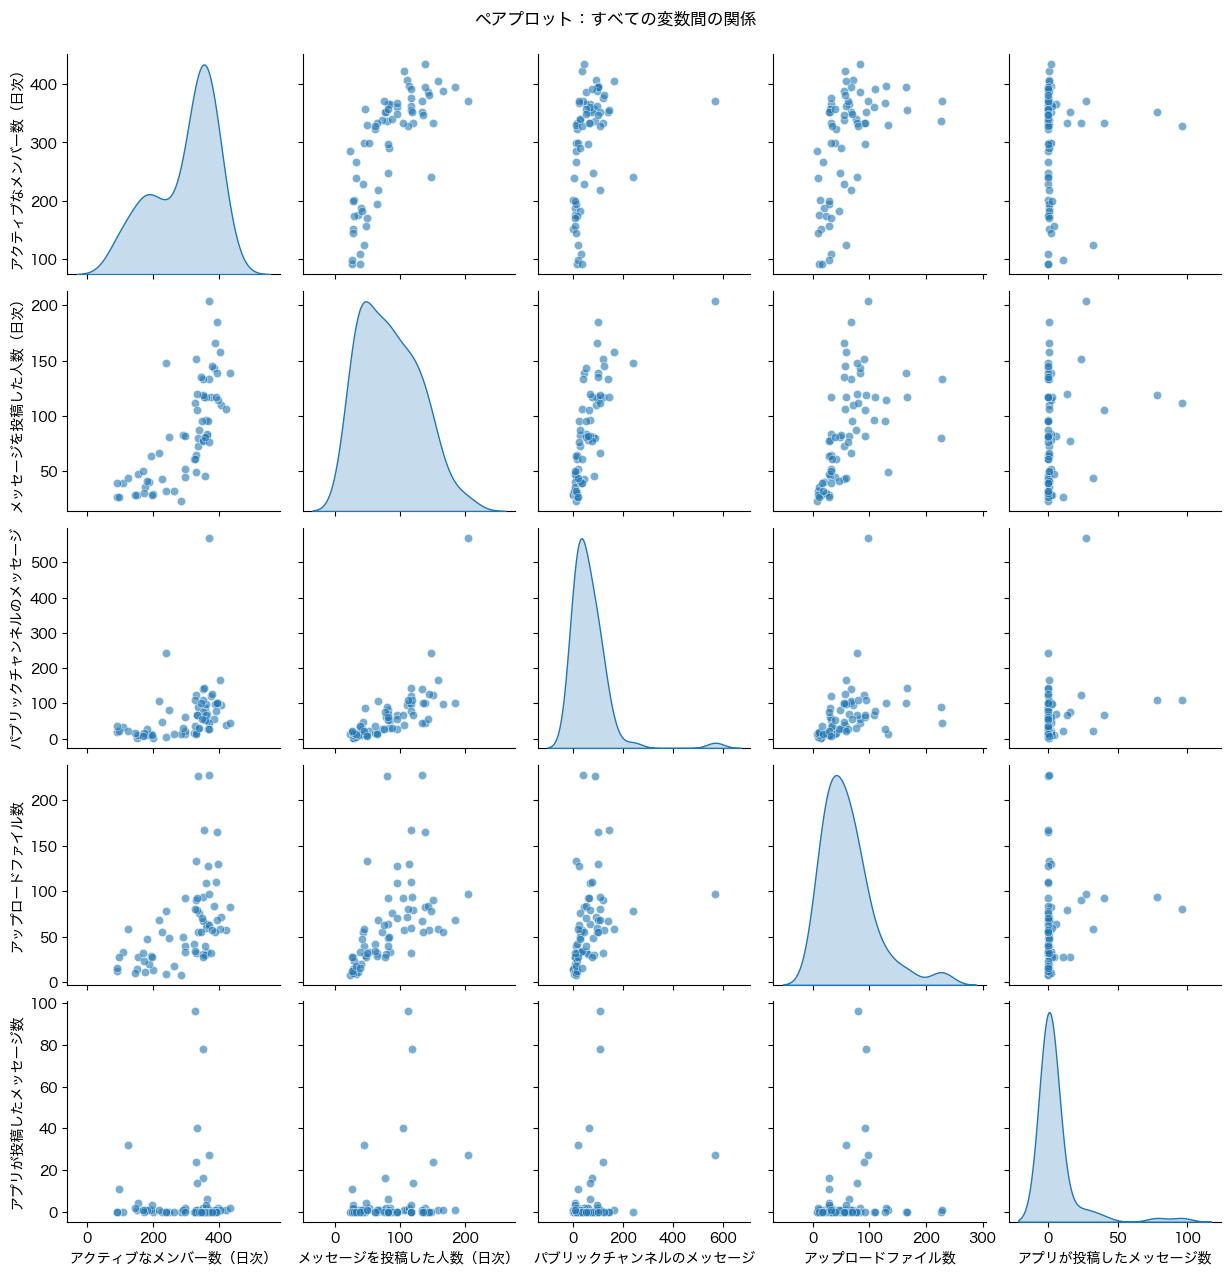

In [40]:
# すべての変数間の関係を一度に可視化
sns.pairplot(df1, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('ペアプロット：すべての変数間の関係', y=1.02)
plt.show()

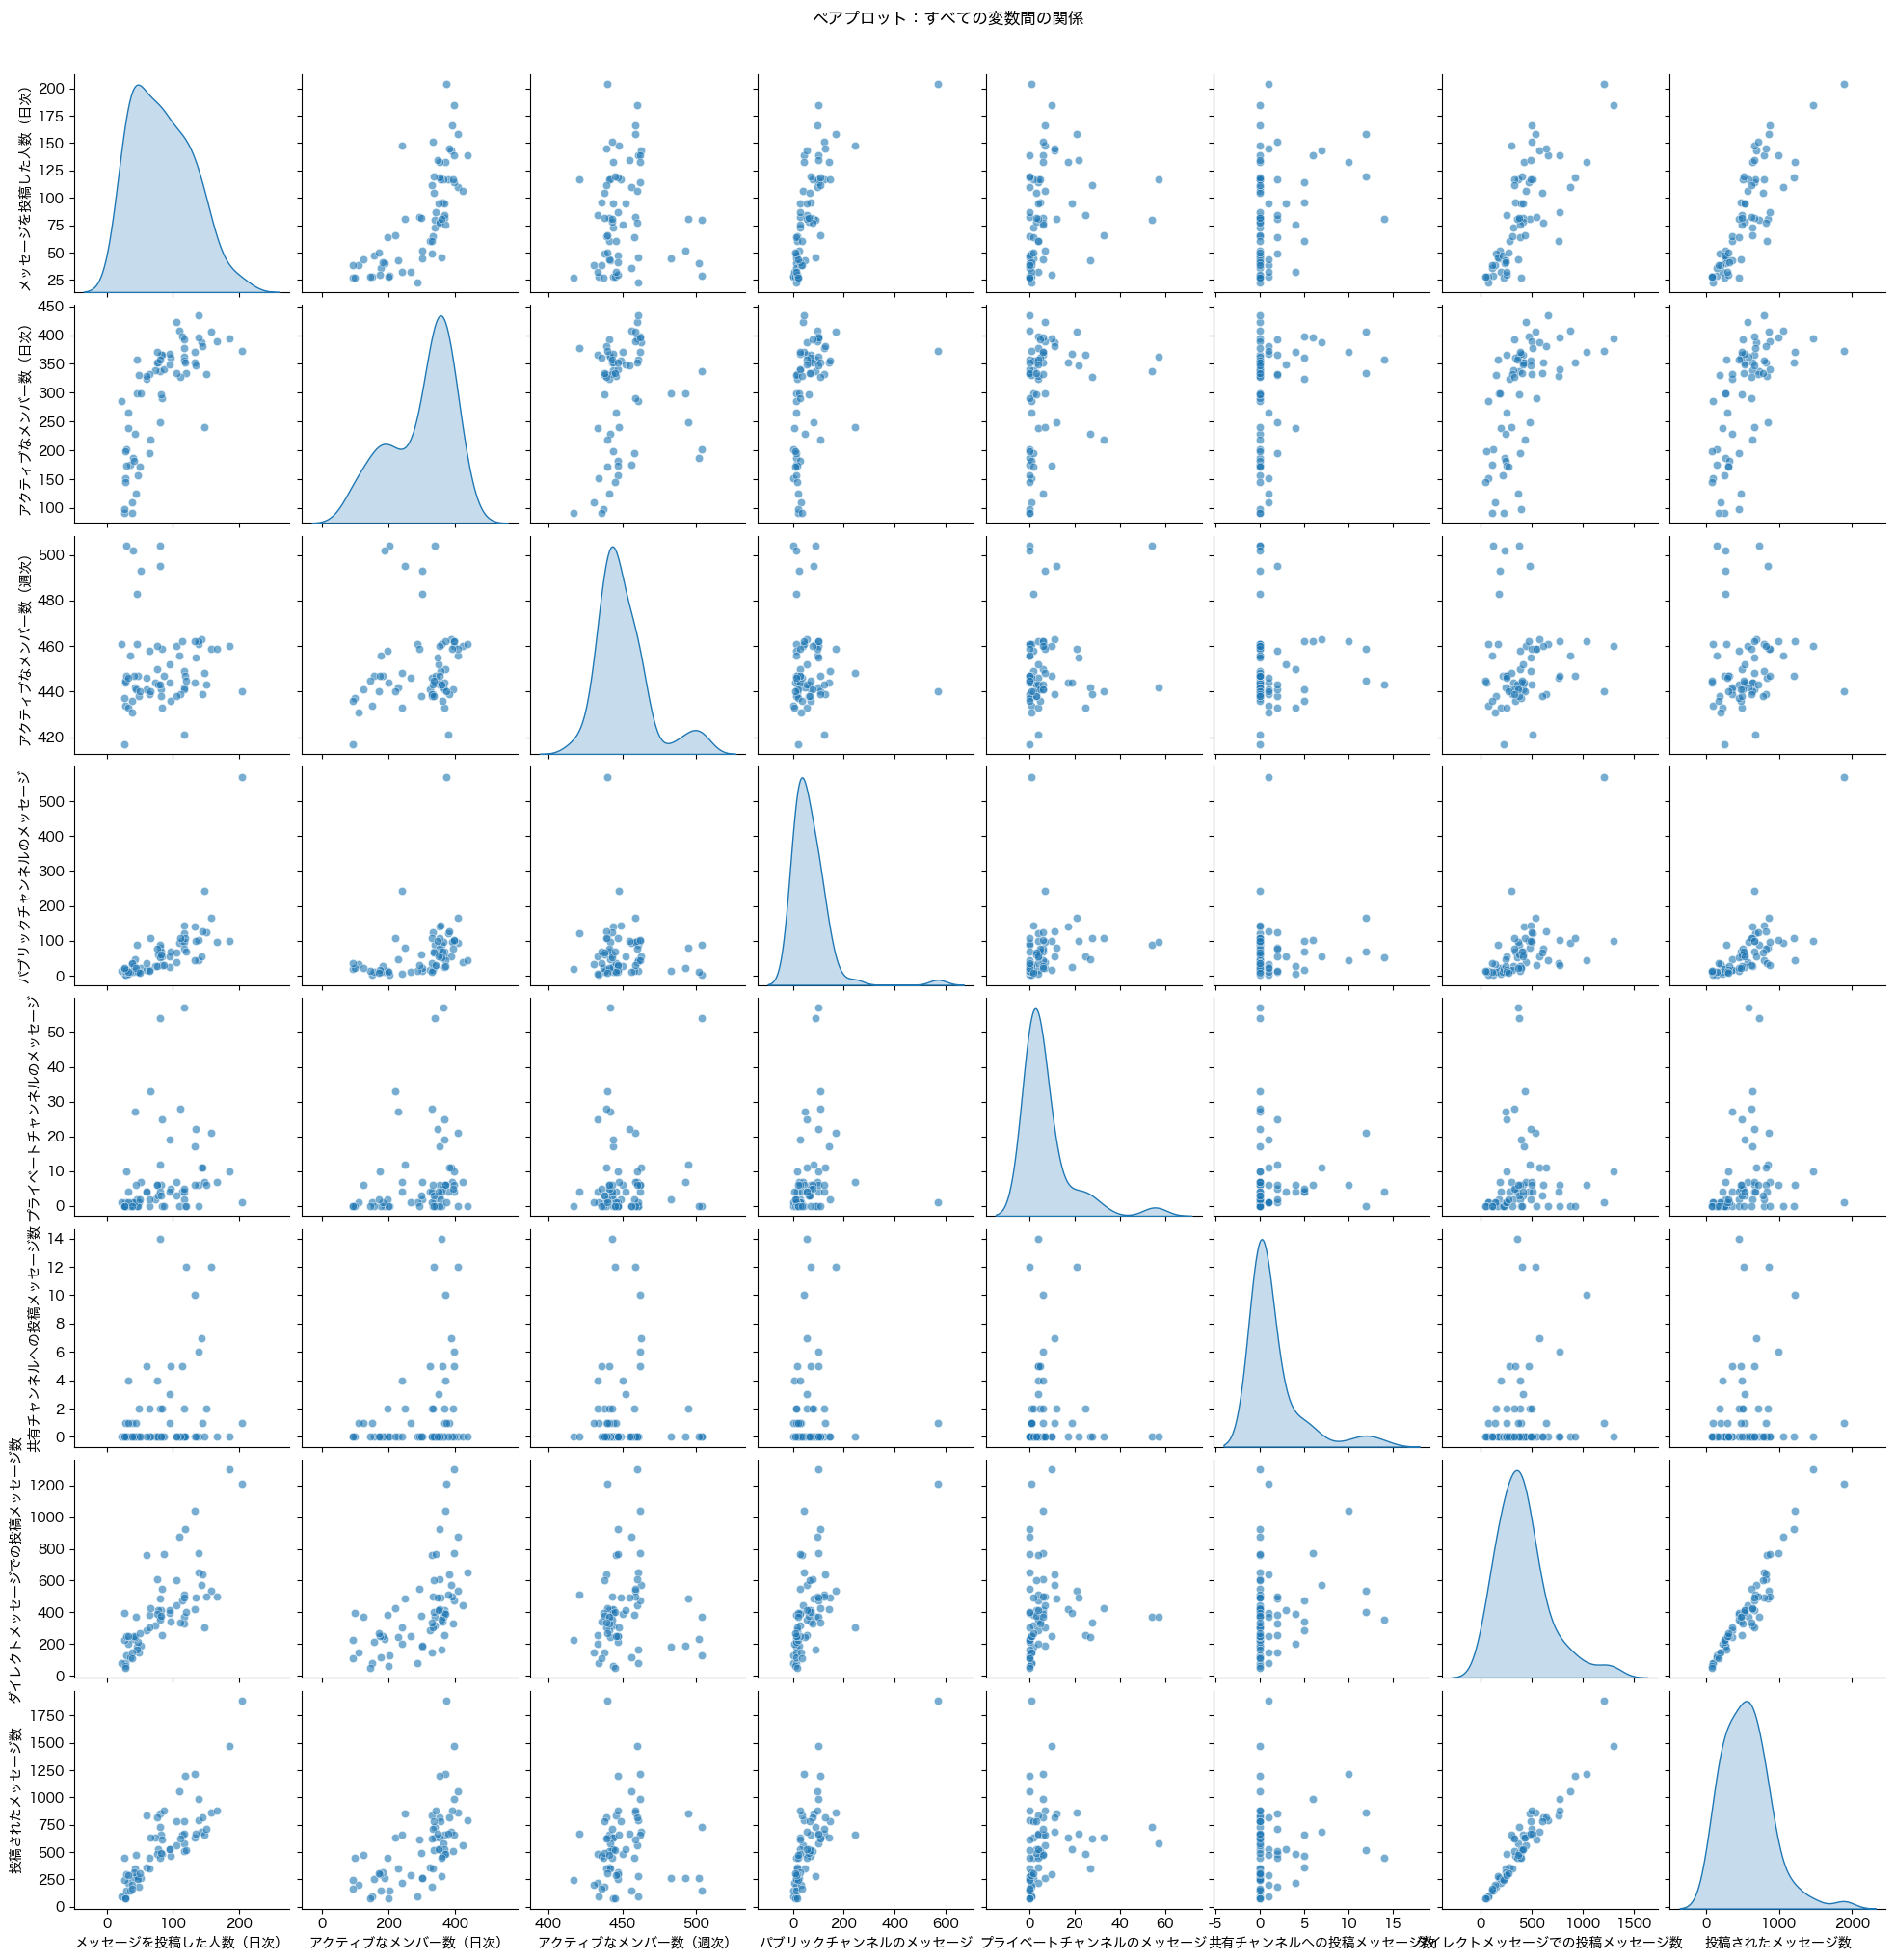

In [41]:
# すべての変数間の関係を一度に可視化
sns.pairplot(df2, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('ペアプロット：すべての変数間の関係', y=1.02)
plt.show()

## 現状と問題点
### 現状
・参加人数が増えればメッセージ数も増える、日次の活動量が多いほど週次の活動量も多いと言う自然の相関関係を示している
・アクティブメンバー数やメッセージの投稿数などは低い値に集中しており、ごく稀に非常に高い値が出ることから、特定の日に多くの活動があることを示唆している
・プライベートチャンネルは多くが0に近い値に集中しており、特に少ないことがわかる
### 問題点
・プライベートチャンネル」の利用率の低さより特秘生の高いコミュニケーションが十分に取られていないことがわかる→使い方を模索する必要があると考える
・先ほど述べた特定の日に活発になるのはイベントや課題などがあるからだと考える。→日々の気軽なコミュニケーションが取れていないことが問題点である
・少人数の閉鎖的なコミュニケーションは取れていないと考えられる
